In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
%load_ext autoreload
%autoreload 2
import nlpUtils as nlpUtils
import plotUtils as pUtils

In [3]:
# read in saved dataframe containing chapter text
unpickled_df = pd.read_pickle("./sla_chapter_text.pkl")
unpickled_df

,chapter_text,book,chapter
0,prelud stormlight archiv kalak round rocki st...,1,1
1,love men frigid thing mountain stream three s...,1,2
2,kill bastard kill sun still hot die day week ...,1,3
3,ten order love forsaken us almighti shard sou...,1,4
4,man stood watch homeland fall dust water surg...,1,5
...,...,...,...
456,discard help potenti ﬁnal passion el ﬁrst fin...,4,127
457,ye look forward rule human el ﬁrst final ten ...,4,128
458,nearli much look forward serv newest odium re...,4,129
459,fourteen month ago eshonai hit ground chasm f...,4,130


In [4]:
# define constants
numBooks = 4
numTopics = 8 # number of topics or clusters
low_doc_freq = 0.01
high_doc_freq = 0.75
do_LDA = False

In [5]:
# vectorize chapter text
vectorized_matrix, vectorizer = nlpUtils.vectorizeTextIDF(unpickled_df['chapter_text'], low_doc_freq, high_doc_freq) # for NMF and kMeans
if do_LDA: vectorized_matrix_noidf, vectorizer_noidf = nlpUtils.vectorizeText(unpickled_df['chapter_text'], low_doc_freq, high_doc_freq) # for LDA

In [6]:
# do NMF
doc_top_matrix, nmf_top_words = nlpUtils.doNMF(numTopics, vectorized_matrix, vectorizer)

# do kMeans clustering
doc_clusters, kMeans_top_words = nlpUtils.dokMeans(numTopics, vectorized_matrix, vectorizer)

# do LDA
if do_LDA: lda_doc_probs = nlpUtils.doLDA(numTopics, vectorized_matrix_noidf, vectorizer_noidf)


NMF Topic Words:
Topic 0: shallan jasnah tyn pattern balat father
Topic 1: kaladin teft syl bridg moash rock
Topic 2: dalinar sadea navani vision gavilar parshendi
Topic 3: venli eshonai rhythm human attun rlain
Topic 4: adolin sadea duel father renarin shallan
Topic 5: navani raboniel sibl tower fuse voidlight
Topic 6: szeth taravangian lash sword odium nin
Topic 7: veil shallan mraiz radiant honorspren pattern

kMeans Cluster Words:
Cluster 0: venli eshonai rhythm human raboniel attun
Cluster 1: kaladin syl teft bridg adolin moash
Cluster 2: navani raboniel kal lirin wit kaladin
Cluster 3: veil shallan adolin mraiz honorspren radiant
Cluster 4: dalinar navani evi vision gavilar taravangian
Cluster 5: shallan jasnah adolin pattern father tyn
Cluster 6: adolin dalinar sadea parshendi plateau navani
Cluster 7: szeth taravangian dalinar lash odium diagram


In [7]:
# update dataframe with document topics and clusters
df_with_results = unpickled_df.copy()
df_with_results['NMF'] = doc_top_matrix[:].tolist()
df_with_results['kMeans'] = doc_clusters
if do_LDA: df_with_results['LDA'] = lda_doc_probs
df_with_results

,chapter_text,book,chapter,NMF,kMeans
0,prelud stormlight archiv kalak round rocki st...,1,1,"[0.003783613540259442, 0.011771335176956456, 0...",2
1,love men frigid thing mountain stream three s...,1,2,"[0.0, 0.01267548867010727, 0.0, 0.0, 0.0154481...",7
2,kill bastard kill sun still hot die day week ...,1,3,"[0.0, 0.1742286844537858, 0.016503742368348794...",1
3,ten order love forsaken us almighti shard sou...,1,4,"[0.02341162172994657, 0.23235177642243274, 0.0...",1
4,man stood watch homeland fall dust water surg...,1,5,"[0.19261855141712647, 0.014177423851827122, 0....",5
...,...,...,...,...,...
456,discard help potenti ﬁnal passion el ﬁrst fin...,4,127,"[0.0, 0.10145817471893642, 0.05032920845922712...",7
457,ye look forward rule human el ﬁrst final ten ...,4,128,"[0.06947778708437755, 0.0, 0.0, 0.240936534746...",0
458,nearli much look forward serv newest odium re...,4,129,"[0.0, 0.15071823220154307, 0.19492395886816016...",4
459,fourteen month ago eshonai hit ground chasm f...,4,130,"[0.00825338701787384, 0.02343307663694235, 0.0...",0


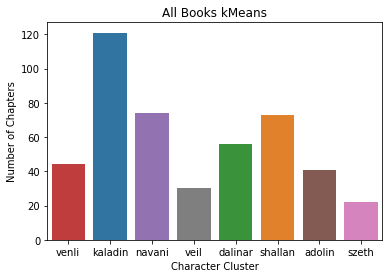

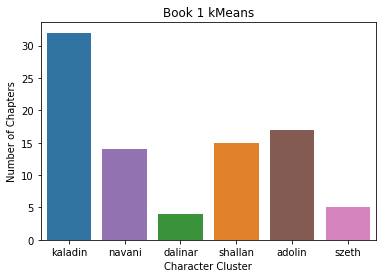

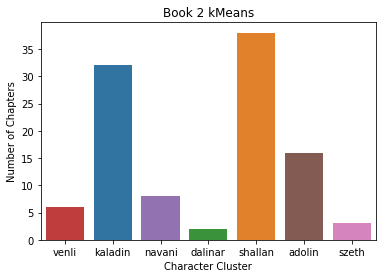

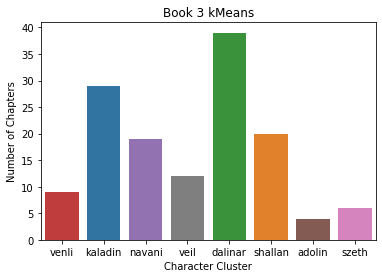

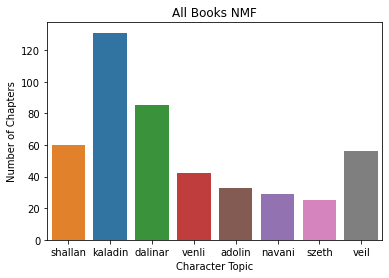

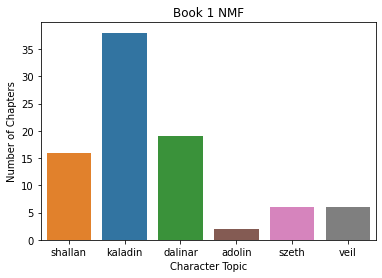

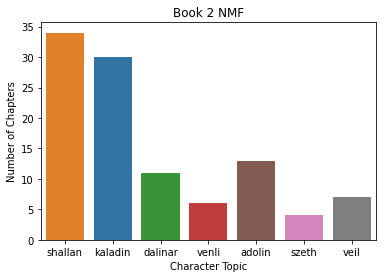

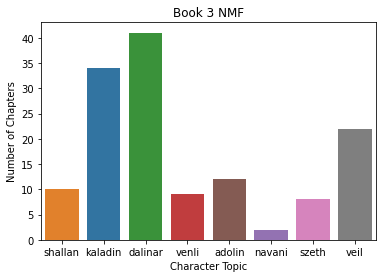

In [8]:
# visualizations

# compare the number of clusters, on a per-book basis, and some type of visualization over time

for i in range(numBooks):
    if i == 0 :
        pUtils.getClusterCounts(df_with_results, kMeans_top_words, i)
    else:
        pUtils.getClusterCounts(df_with_results[df_with_results['book'] == i], kMeans_top_words, i)

        
# do some type of visualizations of the NMF distributions as a whole, similar to kMeans visualizing
    
for i in range(numBooks):
    if i == 0 :
        pUtils.getNMFCounts(df_with_results, nmf_top_words, i)
    else:
        pUtils.getNMFCounts(df_with_results[df_with_results['book'] == i], nmf_top_words, i)
     

breaking at iteration 206 with stress 10802.272497824946


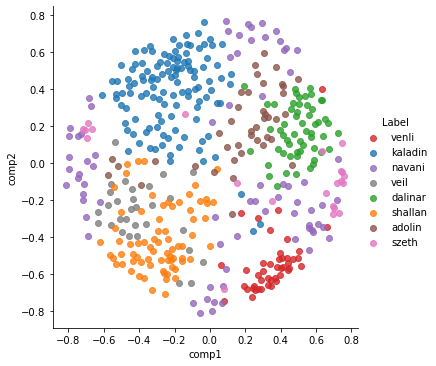

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 461 samples in 0.003s...
[t-SNE] Computed neighbors for 461 samples in 0.148s...
[t-SNE] Computed conditional probabilities for sample 461 / 461
[t-SNE] Mean sigma: 0.377606
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.994423
[t-SNE] KL divergence after 1000 iterations: 0.626809
['venli', 'kaladin', 'navani', 'veil', 'dalinar', 'shallan', 'adolin', 'szeth']


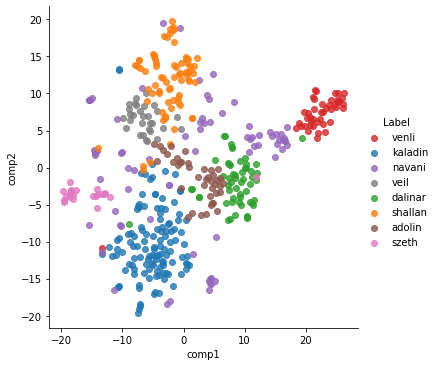

In [9]:
# dimensionality reduction plots
pUtils.makeMDSPlot(vectorized_matrix, df_with_results, kMeans_top_words)
pUtils.makeTSNEPlot(vectorized_matrix, df_with_results, kMeans_top_words, 50)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 461 samples in 0.005s...
[t-SNE] Computed neighbors for 461 samples in 0.270s...
[t-SNE] Computed conditional probabilities for sample 461 / 461
[t-SNE] Mean sigma: 0.291054
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.018135
[t-SNE] KL divergence after 1000 iterations: 0.723631
['venli', 'kaladin', 'navani', 'veil', 'dalinar', 'shallan', 'adolin', 'szeth']


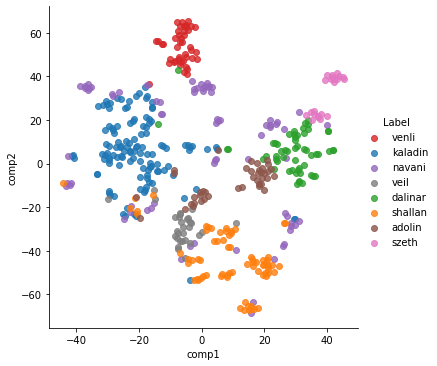

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 461 samples in 0.002s...
[t-SNE] Computed neighbors for 461 samples in 0.131s...
[t-SNE] Computed conditional probabilities for sample 461 / 461
[t-SNE] Mean sigma: 0.331707
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.557388
[t-SNE] KL divergence after 1000 iterations: 0.700688
['venli', 'kaladin', 'navani', 'veil', 'dalinar', 'shallan', 'adolin', 'szeth']


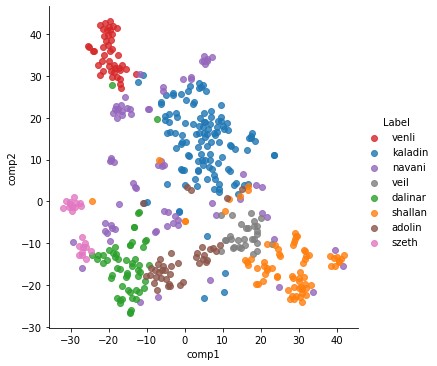

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 461 samples in 0.003s...
[t-SNE] Computed neighbors for 461 samples in 0.139s...
[t-SNE] Computed conditional probabilities for sample 461 / 461
[t-SNE] Mean sigma: 0.352304
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.938576
[t-SNE] KL divergence after 1000 iterations: 0.666311
['venli', 'kaladin', 'navani', 'veil', 'dalinar', 'shallan', 'adolin', 'szeth']


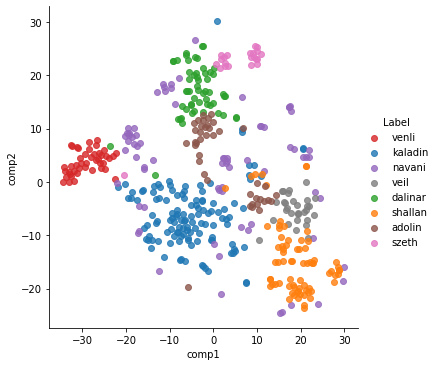

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 461 samples in 0.002s...
[t-SNE] Computed neighbors for 461 samples in 0.133s...
[t-SNE] Computed conditional probabilities for sample 461 / 461
[t-SNE] Mean sigma: 0.366440
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.825562
[t-SNE] KL divergence after 1000 iterations: 0.652621
['venli', 'kaladin', 'navani', 'veil', 'dalinar', 'shallan', 'adolin', 'szeth']


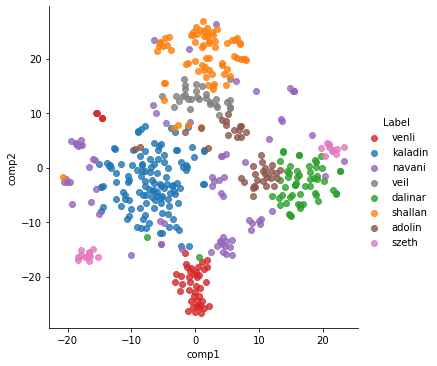

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 461 samples in 0.002s...
[t-SNE] Computed neighbors for 461 samples in 0.131s...
[t-SNE] Computed conditional probabilities for sample 461 / 461
[t-SNE] Mean sigma: 0.377606
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.994423
[t-SNE] KL divergence after 1000 iterations: 0.626809
['venli', 'kaladin', 'navani', 'veil', 'dalinar', 'shallan', 'adolin', 'szeth']


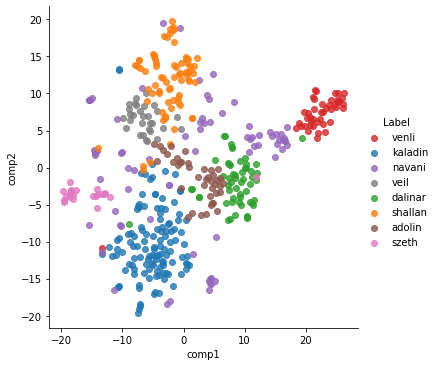

In [10]:
for perp in np.linspace(10,50,5):
    pUtils.makeTSNEPlot(vectorized_matrix, df_with_results, kMeans_top_words, perp)